# Les imports

In [1]:
import pandas as pd
import numpy as np
import sklearn 
import math
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Présenetation du dataset

## Les colonnes

* Le dataset a 10 attributs numériques et 8 attributs catégoriels:
 * les 10 attributs numériques: 
    * `BounceRates`
    * `ExitRates`
    * `PageValues`
    * `SpecialDay`
    * `Month`
    * `OperatingSystems`
    * `Browser`
    * `Region`
    * `TrafficType`
    * `VisitorType`
  * 8 attributs catégoriels:
      * `Revenue`: Étiquette de classe
      * `Administratif` : Nombre de pages de type Administratif visitées par l'utilisateur
      * `Administrative_Duration`: Le temps total passé sur les pages Administratif
      * `Information` : Nombre de pages de type Information visitées par l'utilisateur
      * `Informational_Duration` : Le temps total passé sur les pages Information
      * `ProductRelated`: Nombre de pages de type ProductRelated visitées par l'utilisateur
      * `ProductRelated_Duration` : Le temps total passé sur les pages ProductRelated
      * `Weekend` : 

## recupération du dataset

In [2]:
df = pd.read_csv("./online_shoppers_intention.csv")
#df = pd.read_csv('some_data.csv', usecols = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates'], low_memory = True)



## Infos du dataframe


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Premières ligne

In [4]:
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# Nettoyage des données

## Le nombre de nan par colonne

In [6]:
df.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

## Exemple avec la colonne Administrative

In [7]:
val_nan = []
for i in df['Administrative']:
    if(math.isnan(i)):
        val_nan.append(i)
        
print('Il y a :'.format(len(val_nan)),len(val_nan))
val_nan

Il y a : 14


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

## Valeurs manquantes: `Administrative`, `Informational`, `ProductRelated`

### Processus :

* Remplacer les 0 par none
* Puis remplace des none par la `médiane`

### Nombre de none dans les 3 colonnes

In [8]:
val_nominatif = ['Administrative','Informational','ProductRelated']
cel_not_null = [df[i].isnull().sum() for i in val_nominatif]
cel_not_null
df.Administrative.dtypes

dtype('float64')

### Remplacement des zéro par none

In [9]:
[df[i].replace(0.0, np.nan, inplace= True) for i in val_nominatif ]

[None, None, None]

In [10]:
[df[i].isnull().sum() for i in val_nominatif]

[5768, 9700, 49]

### On remplace toutes les none par la médiane

In [11]:
for cols in val_nominatif:
    median_value=df[cols].median()
    print(median_value)
    df[cols]=df[cols].fillna(median_value)
    
[df[i].isnull().sum() for i in val_nominatif]

3.0
2.0
18.0


[0, 0, 0]

### On vérifie qu'ils existent des valeurs -1 sur la colonne Informational_Duration

In [12]:
list_val = [i for i in df.Informational_Duration if i == -1]
len(list_val)

33

### On remplace les valeurs -1 par none dans val_imputer

In [13]:
val_imputer = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates']

for i in val_imputer:
    for j in df[i]:
        if( j == -1):
            df[i].replace(j, np.nan, inplace= True)


### On teste pour Informational_Duration

In [14]:
df.Informational_Duration

0        0.0
1        0.0
2        NaN
3        0.0
4        0.0
        ... 
12325    0.0
12326    0.0
12327    0.0
12328    0.0
12329    0.0
Name: Informational_Duration, Length: 12330, dtype: float64

### On compte les none

In [15]:
[df[i].isnull().sum() for i in val_imputer]

[47, 47, 47, 14, 14]

### Rremplace les none par la moyenne des colonnes de la liste val_imputer

In [16]:
for i in val_imputer:
    mean_value=df[i].mean()
    df[i]=df[cols].fillna(mean_value)

### On vérifie qu'il n y a plus de valeur nulle.

In [17]:
[df[i].isnull().sum() for i in val_imputer]   

[0, 0, 0, 0, 0]

# Description du dataframe aprés nettoyage

In [18]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,3.718573,31.799351,2.076805,31.799351,31.799351,31.799351,31.799351,31.799351,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,2.603140,44.441310,0.836755,44.441310,44.441310,44.441310,44.441310,44.441310,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,7.000000,2.000000,7.000000,7.000000,7.000000,7.000000,7.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,3.000000,18.000000,2.000000,18.000000,18.000000,18.000000,18.000000,18.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,38.000000,2.000000,38.000000,38.000000,38.000000,38.000000,38.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,705.000000,24.000000,705.000000,705.000000,705.000000,705.000000,705.000000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# Visualisation

## Bounce & Exit Rates Vs Revenue

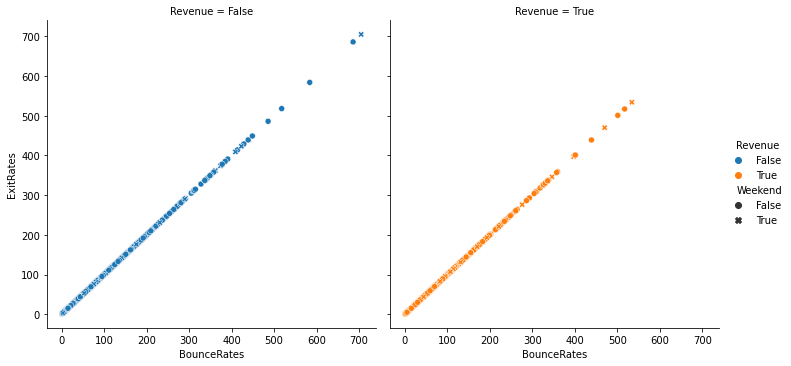

In [19]:
sns.relplot(x="BounceRates", y="ExitRates",col="Revenue",hue="Revenue",style="Weekend", data=df)

## Visitor type & Exit Rates Vs Revenue

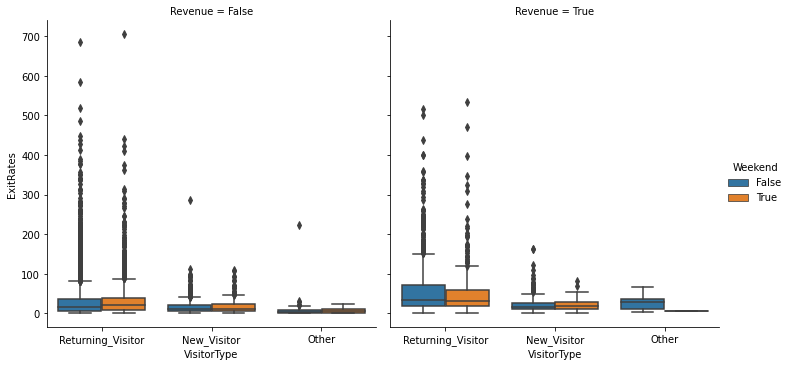

In [20]:
sns.catplot(x="VisitorType", y="ExitRates", hue="Weekend", col="Revenue", data=df, kind="box");

## Carte de corrélation

<AxesSubplot:>

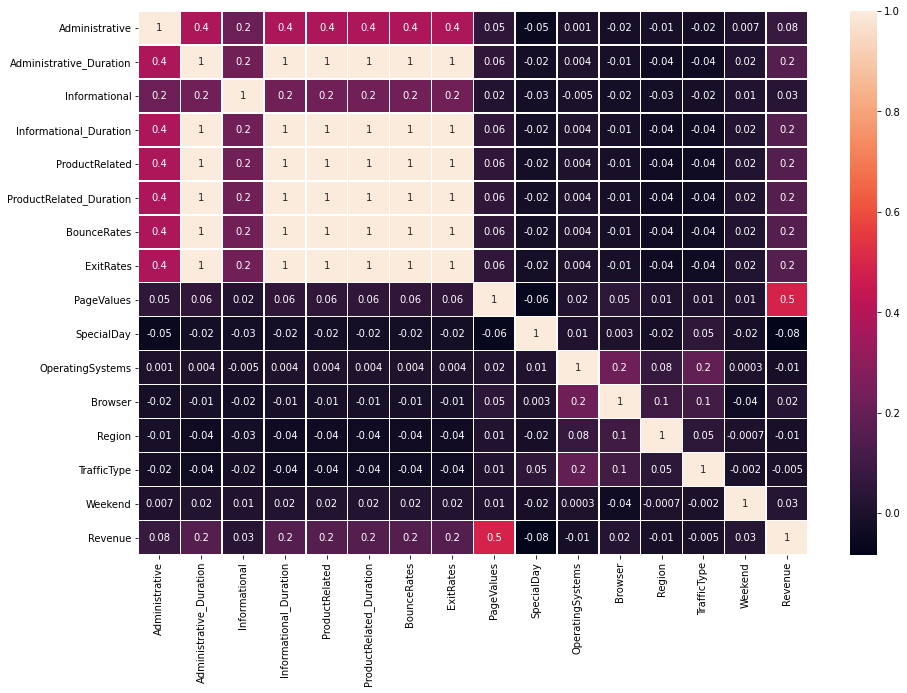

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(df.corr(),annot=True,fmt='.1g', linewidths=.5, ax=ax)

## Mise à l'échelle

In [22]:
Categorical_variables=['Weekend','Revenue','Administrative','Informational','ProductRelated','SpecialDay',
 'OperatingSystems','Browser','Region','Month','TrafficType','VisitorType']

scale=[feature for feature in df.columns if feature not in Categorical_variables]

scaler=StandardScaler()
scaler.fit(df[scale])

StandardScaler()

### Labelisation

In [23]:
from sklearn.preprocessing import LabelEncoder
encoded_features=['Month','VisitorType']

label_encoder = LabelEncoder()
for col in encoded_features:
    df[col] = label_encoder.fit_transform(df[col])
    
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2,1,1,1,1,2,False,False
1,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2,2,2,1,2,2,False,False
2,3.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2,4,1,9,3,2,False,False
3,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2,3,2,2,4,2,False,False
4,3.0,10.0,2.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,2,3,3,1,4,2,True,False


### Train et test 

In [24]:
from sklearn.model_selection import train_test_split

X=df.drop(['SpecialDay','VisitorType','Weekend','Revenue'],axis=1)
y=df.Revenue

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
X_train.shape, X_test.shape ,y_train.shape, y_test.shape

((9864, 14), (2466, 14), (9864,), (2466,))

### Selection du bon modél cross-validation

In [25]:
from sklearn.model_selection import cross_val_score

logreg_cv = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000)
dt_cv=DecisionTreeClassifier()
rt_cv=RandomForestClassifier()
knn_cv=KNeighborsClassifier()

cv_models = dict(Logistic_Regression = logreg_cv, Decision_Tree = dt_cv, RandomForest = rt_cv, KNN = knn_cv)
scores = [key + ": " + str(cross_val_score(value, X, y, cv=10, scoring ='accuracy').mean()) + '%' for key, value in cv_models.items()]
scores

['Logistic_Regression: 0.8811030008110299%',
 'Decision_Tree: 0.8426601784266019%',
 'RandomForest: 0.8845093268450933%',
 'KNN: 0.8811841038118411%']

In [26]:
max(scores)

'RandomForest: 0.8845093268450933%'